<a href="https://colab.research.google.com/github/carlosqu/TesisUniandes/blob/master/Notebook_Tesis_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import figure
from matplotlib import *
import sys
from pylab import *
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import r2_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [42]:
data=pd.read_excel('/content/drive/My Drive/tesis/Universidad de los andes/Luis Francisco Ortiz Santamaria - Balance Demanda/Datos/EIA/Importaciones Refinerias/DF_2000.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
DATE                        233 non-null datetime64[ns]
AVG_API                     233 non-null float64
AVG_AZUFRE                  233 non-null float64
PERCENT_UTILIZACION_PADD    233 non-null float64
CAPACIDAD                   233 non-null int64
API_PROMEDIO_PADD           233 non-null float64
KBD_MONTH                   233 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 12.8 KB


In [59]:
data['Date_Time'] = pd.to_datetime(data.DATE , format = '%m/%d/%Y')
data.index = data.Date_Time
data = data.drop(['Date_Time'], axis=1)
data = data.drop(['DATE'], axis=1)
data.head()

,AVG_API,AVG_AZUFRE,PERCENT_UTILIZACION_PADD,CAPACIDAD,API_PROMEDIO_PADD,KBD_MONTH
Date_Time,,,,,,
2000-01-31,19.541818,2.868312,86.5,7553,31.08,1322.741935
2000-02-29,19.345584,2.833247,87.9,7546,31.42,1519.413793
2000-03-31,19.841379,2.866092,91.5,7548,31.23,1448.129032
2000-04-30,19.304146,2.794390,93.1,7548,31.21,1498.666667
2000-05-31,19.436709,2.890127,94.9,7548,31.65,1446.709677


## **Modelo NN univariado**

In [0]:
uni=data[['KBD_MONTH']]

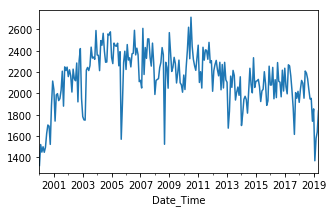

In [12]:
uni = uni.sort_index()
plt.figure(figsize=(5, 3))
uni['KBD_MONTH'].plot()

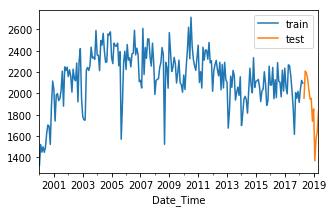

In [13]:
split_date = pd.Timestamp('2018-05-01')
df =  uni['KBD_MONTH']
train = df.loc[:split_date]
test = df.loc[split_date:]
plt.figure(figsize=(5, 3))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [0]:
scaler = MinMaxScaler(feature_range=(-1, 1))

In [0]:
train=train.values.reshape(-1,1)
train_sc = scaler.fit_transform(train)
test=test.values.reshape(-1,1)
test_sc = scaler.transform(test)

In [0]:
np.random.shuffle(train_sc)

In [0]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [31]:
nn_model = Sequential()
nn_model.add(Dense(100, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1,callbacks=[early_stop] ,shuffle=False)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1371
Epoch 2/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1320
Epoch 3/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1314
Epoch 4/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1310
Epoch 5/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1308
Epoch 6/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1306
Epoch 7/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1304
Epoch 8/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1304
Epoch 9/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1303
Epoch 10/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1302
Epoch 11/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1301
Epoch 12/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1300
Epoch 13/100


In [32]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.013
The R2 score on the Test set is:	-56.788


In [0]:
nn_y_pred_test = nn_model.predict(X_test)

In [34]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)

12/12 [==============================] - 0s 4ms/step
NN: 3571178.583333


In [0]:
test_predict = scaler.inverse_transform(y_pred_test_nn)
test = df.loc[split_date:]
test=test.values.reshape(-1,1)
y_test = test[1:]

In [36]:
print(np.sqrt(mean_squared_error(y_test,y_pred_test_nn)))

1889.7562136334595


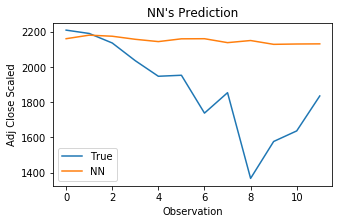

In [37]:
plt.figure(figsize=(5, 3))
plt.plot(y_test, label='True')
plt.plot(test_predict, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

## **Modelo univariado (con look_back)**

In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
split_date = pd.Timestamp('2018-05-01')
dataset =  uni['KBD_MONTH']
train = dataset.loc[:split_date]
test = dataset.loc[split_date:]

In [0]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [106]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
model.fit(trainX, trainY, epochs=200, batch_size=2,callbacks=[early_stop], verbose=2)

Epoch 1/200
 - 1s - loss: 6232392.7130
Epoch 2/200
 - 0s - loss: 2844426.0382
Epoch 3/200
 - 0s - loss: 1261241.0639
Epoch 4/200
 - 0s - loss: 355424.5103
Epoch 5/200
 - 0s - loss: 73284.2276
Epoch 6/200
 - 0s - loss: 43486.1471
Epoch 7/200
 - 0s - loss: 42190.1707
Epoch 8/200
 - 0s - loss: 42022.6959
Epoch 9/200
 - 0s - loss: 42026.9681
Epoch 10/200
 - 0s - loss: 42083.3507
Epoch 00010: early stopping


In [107]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 41619.39 MSE (204.01 RMSE)
Test Score: 53189.17 MSE (230.63 RMSE)


In [0]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

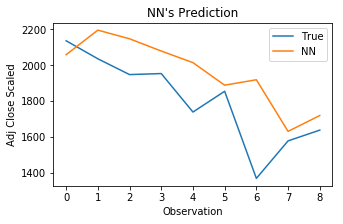

In [109]:
plt.figure(figsize=(5, 3))
plt.plot(testY, label='True')
plt.plot(testPredict, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();